#**Task -3 Basic Machine Learning Task**
##Objective: Build a simple Linear Regression model to predict a numerical value based on a single feature.

Submitted by: Akshat Thakur


#**Step 1: Create a Small Dataset**
In this step, we create a dataset that will be used to train and evaluate our Linear Regression model. The dataset consists of two columns: one feature and one target variable. The feature is the independent variable, and the target is the dependent variable that we want to predict.

Here, we use numpy to generate a sequence of numbers for the feature and add some random noise to the target variable to simulate real-world data. We then save this dataset as a CSV file.

In [1]:
import pandas as pd
import numpy as np

# Create a dataset with 60 rows
np.random.seed(42)  # For reproducibility
data = {
    'feature': np.arange(1, 61),  # Feature column with values from 1 to 60
    'target': np.arange(1, 61) + np.random.normal(0, 5, 60)  # Target column with some noise
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save the dataset to a CSV file
df.to_csv('simple_dataset.csv', index=False)

# Display the first few rows of the dataset
print(df.head())


   feature     target
0        1   3.483571
1        2   1.308678
2        3   6.238443
3        4  11.615149
4        5   3.829233


#**Step 2: Implement Linear Regression using a Machine Learning Library**

Linear Regression is a simple machine learning algorithm used for predicting a continuous target variable based on one or more features. It assumes a linear relationship between the feature(s) and the target. The goal is to find the best-fitting line that minimizes the sum of squared differences between the observed and predicted values.

We use scikit-learn to implement Linear Regression. The dataset is split into training and testing sets to evaluate the model’s performance on unseen data. The model is then trained using the training set.

In [2]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
data = df  # Using the dataset created above

# Split the data into features and target variable
X = data[['feature']]
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

#**Step 3: Train and Evaluate the Model**

After training the model, we need to evaluate its performance to understand how well it predicts the target variable. Common metrics for regression models include Mean Squared Error (MSE) and R-squared (R²) score. MSE measures the average squared difference between the observed and predicted values, while R² indicates the proportion of variance in the target variable explained by the model.

We use the testing set to make predictions and calculate the MSE and R² score to evaluate the model’s performance

In [3]:
# Evaluate the model
y_pred = model.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 15.10040835439716
R^2 Score: 0.9643818477181384


#**Step 4: Visualize the Regression Line on a Scatter Plot**

Visualizing the regression line helps us understand the relationship between the feature and the target variable. A scatter plot of the data points along with the regression line shows how well the model fits the data.

We use matplotlib to create a scatter plot of the data points and overlay the regression line. This visualization helps us see how well the model captures the trend in the data

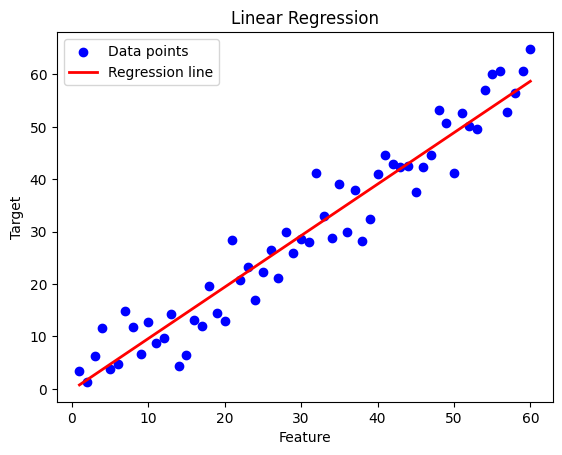

In [4]:
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(X, y, color='blue', label='Data points')

# Plot the regression line
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression line')

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()

# Show the plot
plt.show()


#**Step 5: Plot Summary of Model Performance Metrics**

In this step, we visualize the performance metrics of our Linear Regression model. Plotting these metrics helps us quickly understand how well the model is performing. The Mean Squared Error (MSE) indicates the average squared difference between the observed and predicted values, while the R-squared (R²) score shows the proportion of variance in the target variable explained by the model.

In this code, we use matplotlib to create a bar plot that displays the Mean Squared Error and R² Score. This visualization provides a clear and concise summary of the model’s performance, making it easier to interpret the results.

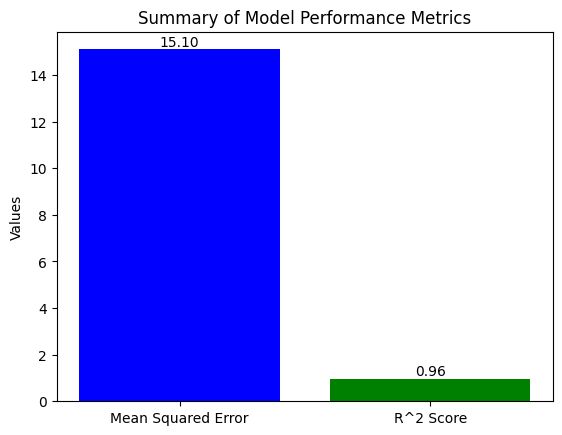

In [6]:
import matplotlib.pyplot as plt

# Data for plotting
metrics = ['Mean Squared Error', 'R^2 Score']
values = [mse, r2]

# Create the plot
fig, ax = plt.subplots()
ax.bar(metrics, values, color=['blue', 'green'])

# Add labels and title
ax.set_ylabel('Values')
ax.set_title('Summary of Model Performance Metrics')

# Display the values on the bars
for i, v in enumerate(values):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()



#**Step 6: Boxplot of the Data**

A boxplot is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It also highlights outliers in the data. Boxplots are useful for identifying the central tendency, variability, and skewness of the data.

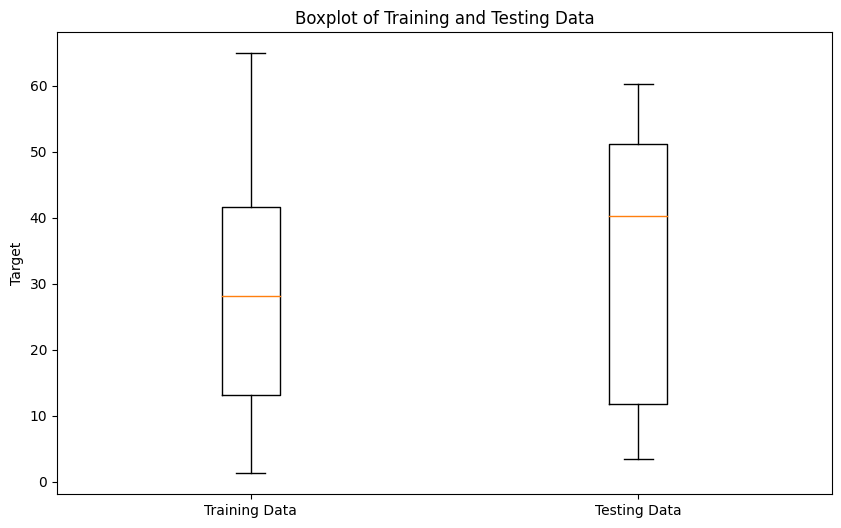

In [7]:
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([y_train, y_test], labels=['Training Data', 'Testing Data'])

# Add labels and title
plt.ylabel('Target')
plt.title('Boxplot of Training and Testing Data')

# Show the plot
plt.show()


#**Step 7: Violin Plot of the Data**

A violin plot combines aspects of a boxplot and a density plot. It shows the distribution of the data across different levels of a categorical variable. The width of the violin represents the density of the data at different values. Violin plots are useful for visualizing the distribution and identifying multimodal data.

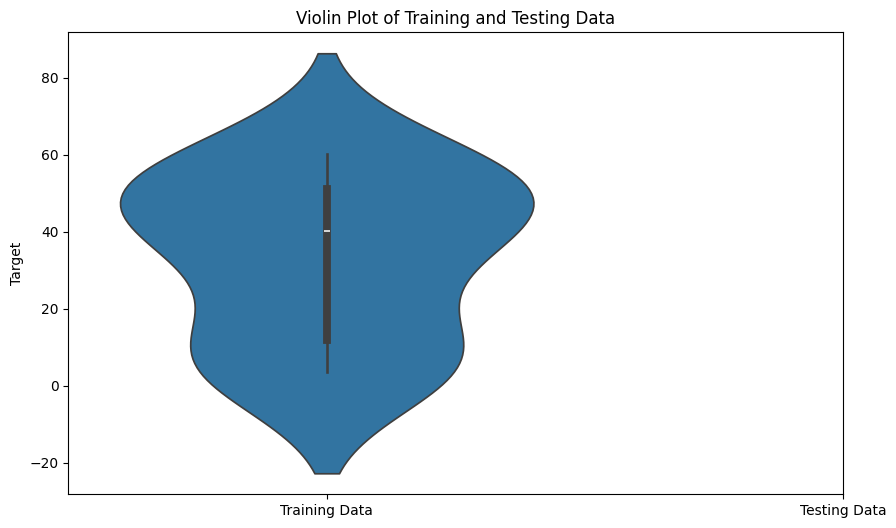

In [8]:
import seaborn as sns

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=[y_train, y_test])

# Add labels and title
plt.ylabel('Target')
plt.title('Violin Plot of Training and Testing Data')
plt.xticks([0, 1], ['Training Data', 'Testing Data'])

# Show the plot
plt.show()


#**Step 8: Residual Plot**

A residual plot is a graphical representation used to analyze the goodness of fit in regression models. It plots the residuals (the differences between observed and predicted values) on the vertical axis and the predicted values on the horizontal axis. This plot helps in identifying non-linearity, unequal error variances, and outliers in the data.



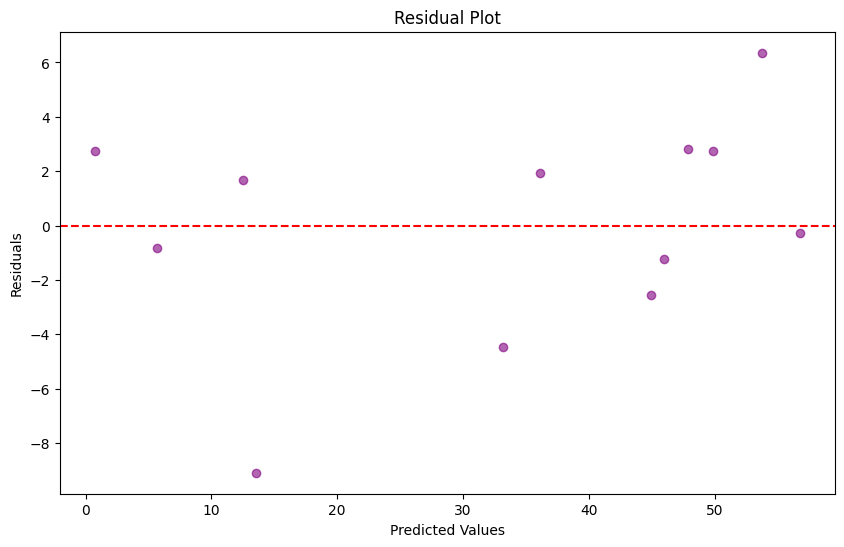

In [9]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)

# Add a horizontal line at zero
plt.axhline(y=0, color='red', linestyle='--')

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Show the plot
plt.show()
